In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [5]:
# copy demo into current directory
ac.copydemo('c2c')

# start AUTO with runner object
runner = ra.runAUTO()

pgm='c2c'
print( pgm, ": first run : find the Hopf bifurcation" )
hb = ac.run(e=pgm,NDIM=3,DSMIN=0.00001,ITNW=7,STOP=['HB1'],NPAR=28,runner=runner)

print( pgm, ": second run : periodic solutions" )
ps = ac.run(hb,IPS=2,ICP=[1,11],NTST=30,UZR={1:0.25},STOP=['UZ2'],runner=runner)
 
print( pgm, ": third run : continue zero eigenfunction until eigenvalue" )
zero = ac.run(ps,IPS=4,ICP=[11,12,10],NDIM=6,NBC=7,NINT=1,UZR={},STOP=['BP3'],runner=runner)

print( pgm, ": fourth run : switch to continuation of nontrivial eigenfunction" )
ef = ac.run(zero,ISW=-1,ILP=0,DS='-',DSMAX=0.2,UZSTOP={10:1.0},runner=runner)

print( pgm, ": fifth run : continue zero eigenfunction until eigenvalue" )
zero1 = ac.run(ef,ISW=1,ICP=[11,4,25,6,26],DS='-',NDIM=12,NBC=14,NINT=2,UZSTOP={},STOP=['BP1'],runner=runner)

print( pgm, ": sixth run : switch to continuation of nontrivial eigenfunction" )
ef1 = ac.run(zero1,ISW=-1,UZSTOP={25:1.0},runner=runner)
 
print( pgm, ": seventh run : switch to second zero eigenfunction until eigenvalue" )
zero2 = ac.run(ef1,ISW=1,ICP=[11,4,5,6,26],UZSTOP={},STOP=['BP3'],runner=runner)

print( pgm, ": eighth run : switch to continuation of second nontrivial eigenfunction" )
ef2 = ac.run(zero2,ISW=-1,UZSTOP={26:1.0},runner=runner)

print( pgm, ": ninth run : homotopy in T,h11,h21" )
ti = ac.run(ef2,ISW=1,ISP=0,ICP=[7,11,4,5,6,21,23],NDIM=15,NBC=19,NINT=2,NTST=110,
   UZR={21:0},UZSTOP={},STOP=['UZ19'],DSMAX=10,runner=runner)

print( pgm, ": tenth run : homotopy in T and h21" )
h12 = ac.run(ti,ICP=[7,23,11,4,5,6,8],NTST=150,UZR={23:0},STOP=['UZ1'],runner=runner)

print( pgm, ": eleventh run : homotopy in T and h12" )
h21 = ac.run(h12,ICP=[7,22,11,4,5,6,8],UZR={22:0},runner=runner)

print( pgm, ": twelfth run : homotopy in T and h22" )
h22 = ac.run(h21,ICP=[7,24,11,4,5,6,8],UZR={24:0},STOP=['UZ2'],runner=runner)

print( pgm, ": thirteenth run : increase period (par 7)" )
inct = ac.run(h22,ICP=[7,11,4,5,6],NTST=200,NINT=0,UZR={7:450},STOP=['UZ1'],runner=runner)

print( pgm, ": fourteenth run : fw continuation in d2 (par2) until LP: primary homoclinic" )
d2 = ac.run(inct,ICP=[1,11,4,5,6,35,36],ILP=1,UZR={1:0.2785},STOP=['LP4'],runner=runner)

ac.save(d2,'d2')

Copying demo c2c ... done
c2c : first run : find the Hopf bifurcation
gfortran -fopenmp -O -c c2c.f90 -o c2c.o
gfortran -fopenmp -O c2c.o -o c2c.exe /auto/lib/*.o
Starting c2c ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)          U(2)          U(3)     
   1     1  EP    1   5.00000E-01   8.69767E+00   7.41582E-01   1.66667E-01   8.66440E+00
   1     6  HB    2   5.12270E-01   8.53471E+00   7.41582E-01   1.66667E-01   8.50080E+00

 Total Time    0.237E-01
c2c ... done
c2c : second run : periodic solutions
Starting c2c ...


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB    PAR(1)        L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)       PERIOD    
   2    27  PD    3   4.28911E-01   9.56863E+00   8.06024E-01   2.22750E-01   9.74420E+00   6.58869E+01
   2    50  UZ    4   2.50000E-01   1.17778E+01   8.17805E-01   2.79474E-01   1.20521E+01   4.89548E+01
   2    54  PD    5   2.16681E-01   1.20869E+01   8.26745E-01   3.01437E-01   1.23896E+01   4.04772E+01
   2    72  LP    6   2.08045E-01   1.20324E+01   8.39384E-01   3.22301E-01   1.23454E+01   3.43745E+01
   2    97  UZ    7   2.50000E-01   1.07916E+01   8.70809E-01   3.81131E-01   1.10793E+01   2.42822E+01

 Total Time    0.783E+00
c2c ... done
c2c : third run : continue zero eigenfunction until eigenvalue
Starting c2c ...

  BR    PT  TY  LAB    PAR(11)       L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)      PAR(12)       PAR(10)    


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


   2    40  BP    8   2.42822E+01   1.07916E+01   8.70782E-01   3.81096E-01   1.10793E+01   0.00000E+00  -6.41468E+00   0.00000E+00
   2   105  BP    9   2.42822E+01   1.07916E+01   8.70772E-01   3.81117E-01   1.10793E+01   0.00000E+00   1.46631E-08   0.00000E+00
   2   110  BP   10   2.42822E+01   1.07916E+01   8.70772E-01   3.81117E-01   1.10793E+01   0.00000E+00   4.39961E-01   0.00000E+00

 Total Time    0.283E+00
c2c ... done
c2c : fourth run : switch to continuation of nontrivial eigenfunction
Starting c2c ...

  BR    PT  TY  LAB    PAR(11)       L2-NORM       MAX U(1)      MAX U(2)      MAX U(3)      MAX U(4)      PAR(12)       PAR(10)    


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


   3    18  UZ   11   2.42822E+01   1.08583E+01   8.70835E-01   3.81084E-01   1.10793E+01   7.13703E-01   4.39961E-01   1.00000E+00

 Total Time    0.122E+00
c2c ... done
c2c : fifth run : continue zero eigenfunction until eigenvalue
Starting c2c ...

  BR    PT  TY  LAB    PAR(11)       L2-NORM       MAX U(1)      MAX U(2)      PAR(4)        PAR(25)       PAR(6)        PAR(26)    
   3    53  BP   12   2.42822E+01   1.52616E+01   8.70776E-01   3.81116E-01  -4.39961E-01   0.00000E+00   2.42822E+01   0.00000E+00

 Total Time    0.451E+00
c2c ... done
c2c : sixth run : switch to continuation of nontrivial eigenfunction
Starting c2c ...

  BR    PT  TY  LAB    PAR(11)       L2-NORM       MAX U(1)      MAX U(2)      PAR(4)        PAR(25)       PAR(6)        PAR(26)    


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


   4    18  UZ   13   2.42822E+01   1.53086E+01   8.70840E-01   3.81136E-01  -4.39961E-01   1.00000E+00   2.42822E+01   0.00000E+00

 Total Time    0.122E+00
c2c ... done
c2c : seventh run : switch to second zero eigenfunction until eigenvalue
Starting c2c ...


Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL



  BR    PT  TY  LAB    PAR(11)       L2-NORM       MAX U(1)      MAX U(2)      PAR(4)        PAR(5)        PAR(6)        PAR(26)    
   4    53  BP   14   2.42822E+01   1.53086E+01   8.70839E-01   3.81130E-01  -4.39961E-01  -4.39961E-01   2.42822E+01   0.00000E+00
   4    56  BP   15   2.42822E+01   1.53086E+01   8.70839E-01   3.81130E-01  -4.39961E-01   6.32195E-06   2.42822E+01   0.00000E+00
   4    89  BP   16   2.42822E+01   1.53086E+01   8.70839E-01   3.81130E-01  -4.39961E-01   6.41468E+00   2.42822E+01   0.00000E+00

 Total Time    0.323E+00
c2c ... done
c2c : eighth run : switch to continuation of second nontrivial eigenfunction
Starting c2c ...

  BR    PT  TY  LAB    PAR(11)       L2-NORM       MAX U(1)      MAX U(2)      PAR(4)        PAR(5)        PAR(6)        PAR(26)    
   5    26  UZ   17   2.42822E+01   1.57385E+01   8.70774E-01   3.81141E-01  -4.39961E-01   6.41468E+00   2.42822E+01   1.00000E+00

 Total Time    0.151E+00
c2c ... done
c2c : ninth run : homotopy in T,

Created plot


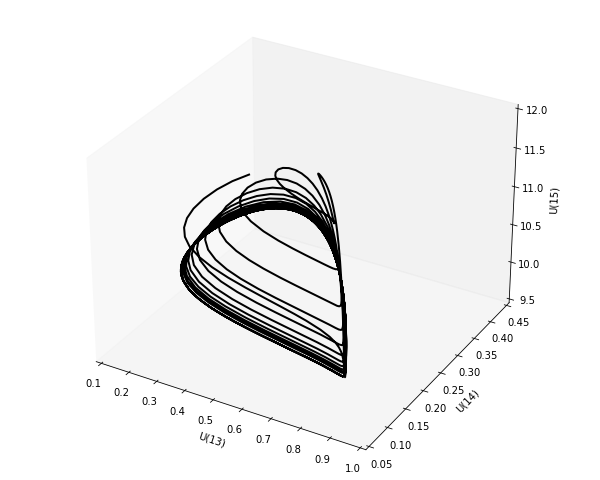

In [7]:
# plot solution showing cycle to cycle heteroclinic connection
# solution labels are 42-49

p = ac.plot('d2')
p.config(type='solution')
p.config(grid=False)
p.config(solution_x='U(13)', solution_y='U(14)', solution_z='U(15)')
p.config(label=[45])
p.savefig('b.png')
display(Image.open('b.png'))

In [8]:
# clean up files

ac.clean()
ac.delete('d2')

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.d2 ... done
Deleting s.d2 ... done
Deleting d.d2 ... done
